In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import patsy as pa
import statsmodels.api as sm
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras.backend as K
%matplotlib inline

C:\Users\default.default-PC\Anaconda2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#import data
path="D:/RESEARCH-2/STATISTIC/PYTHON/2.csv"    
df=pd.read_csv(path)
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1900,0.04,1.32,0.49,0.35,0.77,0.65,0.95,0.14,-0.24,0.23,-0.44,1.19
1,1901,0.79,-0.12,0.35,0.61,-0.42,-0.05,-0.60,-1.20,-0.33,0.16,-0.60,-0.14
2,1902,0.82,1.58,0.48,1.37,1.09,0.52,1.58,1.57,0.44,0.70,0.16,-1.10
3,1903,0.86,-0.24,-0.22,-0.50,0.43,0.23,0.40,1.01,-0.24,0.18,0.08,-0.03
4,1904,0.63,-0.91,-0.71,-0.07,-0.22,-1.53,-1.58,-0.64,0.06,0.43,1.45,0.06


In [11]:
#Subset data
m1=df.iloc[90:101]
m2 = pd.melt(m1, id_vars=['YEAR'], var_name='MONTH')
m4=m2.rename(index=str, columns={"value": "PDO1"})
m4.head()

,YEAR,MONTH,PDO1
0,1990,JAN,-0.30
1,1991,JAN,-2.02
2,1992,JAN,0.05
3,1993,JAN,0.05
4,1994,JAN,1.21


In [29]:
grouped_m = m2.groupby(['YEAR'])

tab=grouped_m['value'].describe()

print(tab)

      count      mean       std   min     25%    50%     75%   max
YEAR                                                              
1990   12.0 -0.355833  0.872410 -2.23 -0.6600 -0.095  0.2975  0.44
1991   12.0 -0.419167  0.871962 -2.02 -1.0550 -0.305  0.3750  0.65
1992   12.0  0.928333  0.531787  0.05  0.6350  0.880  1.3050  1.90
1993   12.0  1.416667  0.845967  0.05  0.9925  1.325  2.1825  2.69
1994   12.0 -0.151667  1.216125 -1.96 -1.3300  0.260  0.8625  1.23
1995   12.0  0.642500  0.683083 -0.49  0.1975  0.610  1.1875  1.71
1996   12.0  0.640833  0.731418 -0.33  0.0600  0.670  1.0325  2.18
1997   12.0  1.460833  0.925030  0.23  0.6650  1.365  2.2300  2.79
1998   12.0  0.245833  1.070705 -1.39 -0.4600  0.180  0.9400  2.01
1999   12.0 -1.063333  0.669441 -2.23 -1.5550 -0.820 -0.5975 -0.32
2000   12.0 -0.590000  0.771362 -2.00 -1.2025 -0.595  0.0350  0.52


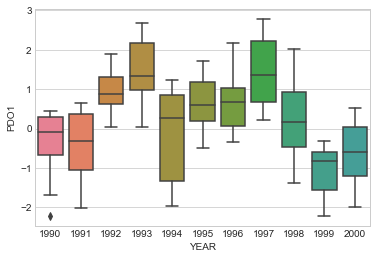

In [30]:
sns.set_palette("husl",20)
sns.set_style("whitegrid")
sns.boxplot(data = m4, x="YEAR", y="PDO1")

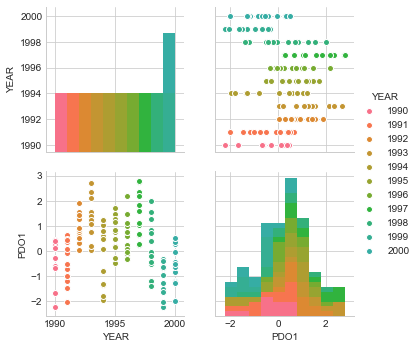

In [31]:
sns.pairplot(m4,hue="YEAR")

In [32]:
m3 = pd.melt(df, id_vars=['YEAR'], var_name='MONTH')
m5=m3.rename(index=str, columns={"value": "PDO2"})
m6 = pd.concat([m4, m5], axis=1, join='inner')
m7 = m6[['PDO1','PDO2']]
m8 = pd.melt(m7, var_name='PDO')
m8.head()

,PDO,value
0,PDO1,-0.30
1,PDO1,-2.02
2,PDO1,0.05
3,PDO1,0.05
4,PDO1,1.21


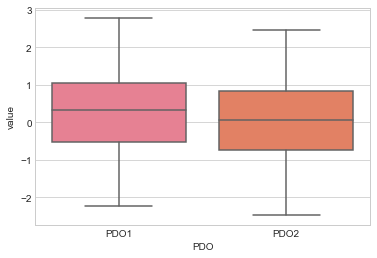

In [33]:
#Graph
sns.set_palette("husl",20)
sns.set_style("whitegrid")
sns.boxplot(data = m8, x="PDO", y="value")


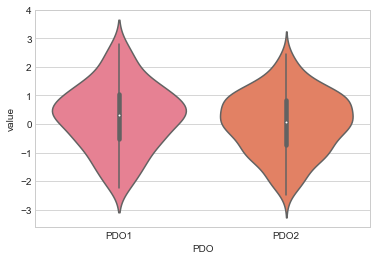

In [39]:
sns.violinplot(data = m8, x="PDO", y="value")

In [41]:
#describle data
grouped_m8 = m8.groupby(['PDO'])
tab=m8['value'].describe()
print(tab)

count    264.000000
mean       0.145303
std        1.105394
min       -2.480000
25%       -0.652500
50%        0.235000
75%        0.930000
max        2.790000
Name: value, dtype: float64


In [42]:
#compare PDO1 và PDO2
from statsmodels.formula.api import ols
lmod = ols('value ~ PDO',data=m8).fit()
print(lmod.summary())





                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.402
Date:                Tue, 27 Nov 2018   Prob (F-statistic):              0.122
Time:                        11:52:27   Log-Likelihood:                -399.35
No. Observations:                 264   AIC:                             802.7
Df Residuals:                     262   BIC:                             809.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2505      0.096      2.610      

NameError: name 'data' is not defined

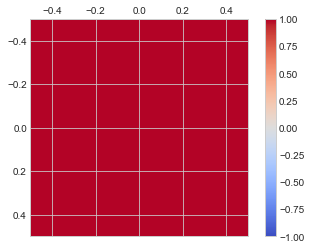

In [36]:
#correlation
corr = m8.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [ ]:
model = ols("y ~ x", m8).fit()
print(lmod)
table = sm.OLS(lmod).fit()
results = sm.OLS(data.endog, data.exog).fit()
table = sm.stats.anova_lm(lmod, typ=2)
print(table)